# Community Detection using Graph Analytics for Marvel's comic book characters - II
### Community Detection

<p>The dataset "MARVEL Comics :1500+ Characters & their Appearance" contains list of Marvel Comics 1567 Characters and name of the comics in which they appeared.</p>

<p>We have tried to use graph analytics and community detection to form group of characters and comics that have overlapping characters.</p>

<p>We have used Leading Eigenvector algorithm for community detection.</p>

<p>This implementation is divided into 2 parts.
<ol>
    <li>Graph preperation</li>
    <li>Community Detection</li>
</ol>
This sheet has the community detection part part. For the ease of implementation, we have saved the processed dataset, edges and the graph into pickle files (dataset.pickle, edges.pickle and graph.pickle respectively), We will using these files in this jupyter notebook.
</p>

In [1]:
import pickle
from igraph import *
import pandas as pd
import matplotlib.pyplot as plt

# Load the object from the pickle file
with open('graph.pickle', 'rb') as f:
    graph = pickle.load(f)

print("graph loaded from graph.pickle")
#print(graph)


graph loaded from graph.pickle


#### Calculating node properties for each node
<ul>
    <li><b>Degree centrality</b> - #of direct ties with other nodes</li>
    <li><b>Closeness centrality</b> -  how close a node is to all other nodes in the graph</li>
    <li><b>Betweenness centrality</b> -  the fraction of shortest paths passing through each vertex</li>
    <li><b>Eigenvector centrality</b> - Measures “who” (not just how many) it is connected to; high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes</li>
    <li><b>Page Rank</b> - a special case Eigenvector centrality</li>
</ul>

In [2]:
df=pd.DataFrame()
df["name"]=graph.vs["name"]
df["Degree centrality"]=graph.degree()  ##getting the degree of each node
df["eigenvector_centrality"]=graph.eigenvector_centrality() ## gettting eigenvector_centrality for each node
df["Closeness centrality"]=graph.closeness()
df["Betweenness centrality"]=graph.betweenness()
df["Page Rank"]=graph.pagerank()

df.sort_values(["Page Rank"], ascending=False)

,name,Degree centrality,eigenvector_centrality,Closeness centrality,Betweenness centrality,Page Rank
1142,Blob,436,0.883356,0.574109,16608.727386,0.003016
118,Daredevil,393,0.963387,0.553846,4653.057891,0.002530
892,Exodus,351,0.819785,0.550112,9711.060863,0.002499
228,Diablo,378,1.000000,0.549125,3271.860606,0.002401
561,Rhino,351,0.866350,0.550112,6383.055118,0.002387
...,...,...,...,...,...,...
773,Lava-Man,1,0.003027,0.334701,0.000000,0.000127
1087,Punisher (2099),1,0.002825,0.334609,0.000000,0.000127
740,Ultra-Adaptoid,1,0.002209,0.330186,0.000000,0.000127
805,Black Widow (Yelena Belova),1,0.002549,0.324755,0.000000,0.000127


#### Calcuting graph diameter
Since there are multiple disconnected graphs in this graph object, so we get a list of numbers for each disconnected graph.

In [3]:
graph.get_diameter()

[532, 549, 662, 7, 868, 294, 1163, 816]

#### Getting graph density
$ graph\_density = \frac{Number\_of\_edges}{Number\_of\_posible edges} $

In [4]:
print("Graph Density:",graph.density())

Graph Density: 0.07727266249774907


#### Getting edge_betweenness for each edge

<b>edge_betweenness</b> - how often the vertex [edge] lies on the 
shortest path between pairs


In [5]:
with open('edges.pickle', 'rb') as f:
    edges = pickle.load(f)

edges["edge_betweenness"]=graph.edge_betweenness()
edges.reset_index(drop=True).sort_values(["edge_betweenness"],ascending=False)

,source,target,edge_betweenness
16710,Cottonmouth,Alex Wilder,2446.000000
59224,Hydro-Man,Nick Fury (Ultimate),1628.351084
58609,Dragon Lord,Scarecrow (Ebenezer Laughton),1414.295739
56831,Pixie,Alex Wilder,1358.530493
56837,Alex Wilder,Pixie,1358.530493
...,...,...,...
38952,Baroness S'Bak,Preak,0.500000
51358,Elite,Molly Von Richtofen,0.500000
16820,Alpha Flight (Ultimate),Professor X (Ultimate),0.500000
26977,The Liberteens,Armory,0.500000


#### Detecting community using leading_eigenvector algorithm

In [6]:
communities=graph.community_leading_eigenvector()
# Get the number of communities detected
num_communities = len(communities)

print("Number of Communities detected:", num_communities)


Number of Communities detected: 29


In [7]:
# Load the object from the pickle file
with open('dataset.pickle', 'rb') as f:
    dataset = pickle.load(f)

print("dataset loaded from dataset.pickle")

dataset loaded from dataset.pickle


In [8]:
dataset=dataset.groupby('source_character')['comic_book'].apply(set).reset_index()

In [14]:
# Get the membership of each node in its respective community
membership = communities.membership

df["community"]=membership
    
df_community=df.merge(dataset, left_on="name", right_on="source_character", how="inner").drop(
    ["source_character"],axis=1)
df_community["comic_book_list"]=df_community["comic_book"].apply(lambda x: ",".join(x))
df_community=df_community.drop(["comic_book"], axis=1)
df_community.drop(["comic_book_list"], axis=1)

,name,Degree centrality,eigenvector_centrality,Closeness centrality,Betweenness centrality,Page Rank,community
0,Venom (Mac Gargan),197,0.407907,0.493349,1675.394732,0.001417,0
1,Spectrum,152,0.459220,0.484945,1394.980615,0.001105,9
2,Captain America (House of M),33,0.058810,0.410325,0.000000,0.000347,9
3,Silver Fox,33,0.052904,0.419897,6.166904,0.000354,8
4,Arnim Zola,88,0.165176,0.451661,116.857848,0.000713,9
...,...,...,...,...,...,...,...
1238,Shang-Chi (Ultimate),41,0.007808,0.365810,429.384050,0.000686,12
1239,Blindfold,1,0.000838,0.311134,0.000000,0.000129,9
1240,Purple Man,66,0.122033,0.458427,364.690619,0.000596,0
1241,Ironheart (Riri Williams),42,0.048619,0.434351,306.914027,0.000493,9


In [15]:
print("Node count in each community")
df_community.groupby(["community"]).agg(
    node_count=("name","count")).sort_values(
    ["community"], ascending=True).reset_index()

Node count in each community


,community,node_count
0,0,229
1,1,3
2,2,3
3,3,2
4,4,4
5,5,2
6,6,2
7,7,2
8,8,314
9,9,419


2D-Graphical representation of community: 26
Nodes are Supernaut, Mulholland Black, Calamity, Veda, The Order, Anthem


<Figure size 1080x648 with 0 Axes>

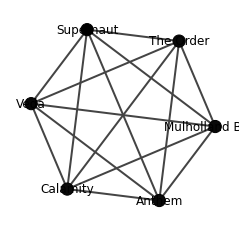

In [17]:
print("2D-Graphical representation of community: 26")
print("Nodes are",", ".join(df[df["community"]==26]["name"]))
nodes = df[df["community"]==26]["name"]
#neighbors = graph.neighbors(node)
#list(nodes)

plt.figure(figsize=(15, 9)) 
fig, ax = plt.subplots()
sub_graph=graph.subgraph(list(nodes))
sub_graph.vs["label"] = list(nodes)
plot(sub_graph, layout='kk', target=ax, vertex_color=communities.membership)
plt.show()

In [18]:
print("List of comic books that belong to characters from community 28")
df_community_comic=df_community.groupby(["community","comic_book_list"]).agg(node_count=("name","count")).sort_values(["node_count"], ascending=False).reset_index()
#df_community_comic["comic_book"]=df_community_comic["comic_book_list"].apply(lambda x: x.split(","))
comic_list_0=df_community_comic[df_community_comic["community"]==28].groupby("community")["comic_book_list"].apply(list).reset_index()
comic_list=[]
for i in comic_list_0.loc[0,"comic_book_list"]:
    for j in i.split(","):
        if j not in comic_list:
            comic_list.append(j)
            
comic_list

List of comic books that belong to characters from community 28


['Thor (1966) ',
 'Incredible Hulk (1962) ',
 'Chaos War: Chaos King (2010) ',
 'Asgardians Of The Galaxy Vol. 1: The Infinity Armada (Trade Paperback)',
 ' Sorcerer Supreme (1988) ',
 'Doctor Strange',
 'Captain America Comics: 70th Anniversary Edition (2010) ',
 'Hulk (2008) ',
 'Hulk Annual (1999) ',
 'Immortal Hulk (2018) ',
 'Hulk (1999) ',
 'Fantastic Force (2009) ',
 'Hulk Visionaries: Peter David Vol. 1 (Trade Paperback)',
 'Annihilation: Ronan (2006) ',
 'AVENGERS: GALACTIC STORM VOL. 2 TPB (Trade Paperback)',
 'Civil War II: Choosing Sides (2016) ',
 'World War Hulk: Warbound (2007) ',
 'Marvel Comics Presents (1988) ',
 'Damage Control (1989) ',
 'Irredeemable Ant-Man (2006) ',
 'Damage Control (1991) ',
 'DAREDEVIL EPIC COLLECTION: BROTHER',
 'Black Goliath (1976) ',
 'Marvel Visionaries: Chris Claremont (Hardcover)',
 'Daredevil (1964) ',
 'Daredevil (1998) ',
 'Marvel Masterworks: Daredevil Vol. 3 (Hardcover)',
 ' Inside and Out Vol. 2 (Trade Paperback)',
 'Daredevil Annu

In [19]:
print("List of comic books that belong to characters from community 8")
df_community_comic=df_community.groupby(["community","comic_book_list"]).agg(node_count=("name","count")).sort_values(["node_count"], ascending=False).reset_index()
#df_community_comic["comic_book"]=df_community_comic["comic_book_list"].apply(lambda x: x.split(","))
comic_list_0=df_community_comic[df_community_comic["community"]==8].groupby("community")["comic_book_list"].apply(list).reset_index()
comic_list=[]
for i in comic_list_0.loc[0,"comic_book_list"]:
    for j in i.split(","):
        if j not in comic_list:
            comic_list.append(j)
            
comic_list

List of comic books that belong to characters from community 8


[' Mutant & Mortal (Hardcover)',
 'X-Force: Famous',
 'X-Force (1991) ',
 'Uncanny X-Men (1963) ',
 'Inhumans (2000) ',
 'X-Men Visionaries: Jim Lee (Trade Paperback)',
 'MARVEL MASTERWORKS: THE UNCANNY X-MEN VOL. 2 HC (Hardcover)',
 'X-MEN: THE DARK PHOENIX SAGA TPB (Trade Paperback)',
 'Fantastic Four/Inhumans (Trade Paperback)',
 'Uncanny X-Force (2010) ',
 'X-Men: The Complete Age of Apocalypse Epic Book 3 (Trade Paperback)',
 'Astonishing X-Men (1995) ',
 'X-Man (1995) ',
 'X-Factor (1986) ',
 'X-MEN: OLD SOLDIERS TPB (Trade Paperback)',
 'X-Men: Mutant Massacre (Trade Paperback)',
 'X-Treme X-Men (2001) ',
 'Excalibur (1988) ',
 'Uncanny X-Men Omnibus Vol. 1 (Hardcover)',
 'New Mutants Classic Vol. 1 (Trade Paperback)',
 'Deadpool (1997) ',
 'EARTH X TPB [NEW PRINTING] (Trade Paperback)',
 'Exiles Vol. II: A World Apart (Trade Paperback)',
 'Maximum Security (2000) ',
 'New X-Men (2001) ',
 'Chaos War: X-Men (2010) ',
 'Classic X-Men (1986) ',
 'Avengers Assemble Vol. 4 (Hardcove